<a href="https://colab.research.google.com/github/paarthpatel10/Crop_Yield_Predction/blob/main/Crop_Yield_Prediction_Model_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### 1. Problem Formulation
The goal is to predict crop yield based on various factors like crop type, area, production, rainfall, fertilizer, and pesticide usage.

### 2. Data Acquisition

In [ ]:
# importing dataset
df = pd.read_csv('/crop_yield (4).csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


### 3. Data Preprocessing

In [ ]:
#filtering data whose area is less than 1000 hectares
dataf= df[df['Area']>=1000]
len(dataf)

15425

In [ ]:
#filtering data whose Production is less than 1000 Metric Ton
dataf= dataf[dataf['Production']>=1000]
len(dataf)

14688

In [ ]:
#filtering data whose Pesticide is less than 1000 kilograms/hectares
dataf= dataf[dataf['Pesticide']>=1000]
len(dataf)

12234

In [ ]:
#filtering data whose Fertilizer is less than 1000 kilograms/hectares
dataf= dataf[dataf['Fertilizer']>=1000]
len(dataf)

12234

In [ ]:
#checking if there any null values
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [ ]:
# Handle missing values, if any
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


### **Data Visulization**

In [ ]:
# dropping 2020 data as it is incomplete
numeric_columns = df.select_dtypes(include='number')
df_year = dataf[dataf['Crop_Year']!=2020]

annual_data = df_year.groupby('Crop_Year').sum()
annual_data

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,,,,,,,,,
1997,ArecanutArhar/TurCoconut Cotton(lint)Dry chill...,Whole Year Kharif Whole Year Kharif Wh...,AssamAssamAssamAssamAssamAssamAssamAssamAssamA...,1.660496e+08,6086953831,5.367762e+05,1.580294e+10,5.147538e+07,25103.974609
1998,GroundnutRiceRiceRiceSugarcaneArecanutArhar/Tu...,Rabi Kharif Rabi Summer Kh...,PuducherryPuducherryPuducherryPuducherryPuduch...,1.500787e+08,7867913096,8.736058e+05,1.482777e+10,4.352282e+07,35598.126418
1999,ArecanutArhar/TurBananaCastor seedCoconut Cott...,Whole Year Kharif Whole Year Kharif Wh...,AssamAssamAssamAssamAssamAssamAssamAssamAssamA...,1.470237e+08,8549849035,8.562878e+05,1.560362e+10,3.969639e+07,49603.628488
2000,Arhar/TurArhar/TurBajraBajraBananaCashewnutCas...,Kharif Rabi Kharif Rabi Wh...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.474873e+08,9562288298,8.979420e+05,1.447883e+10,3.834669e+07,57870.082947
2001,Arhar/TurArhar/TurBajraBajraBananaCashewnutCas...,Kharif Rabi Kharif Rabi Wh...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.456564e+08,9314473696,8.493393e+05,1.487588e+10,3.787065e+07,56233.743674
2002,Arhar/TurArhar/TurBajraBajraBananaCashewnutCas...,Kharif Rabi Kharif Rabi Wh...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.427426e+08,12409202450,8.296919e+05,1.351344e+10,3.568566e+07,65283.025045
2003,Arhar/TurArhar/TurBajraBajraBananaCashewnutCas...,Kharif Rabi Kharif Rabi Wh...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.496561e+08,12313583226,9.205754e+05,1.481296e+10,3.591745e+07,66617.967006
2004,ArecanutArhar/TurBajraBajraBananaBlack pepperC...,Whole Year Kharif Kharif Summer Wh...,KarnatakaKarnatakaKarnatakaKarnatakaKarnatakaK...,1.479772e+08,13816918343,8.912580e+05,1.603185e+10,3.107522e+07,63450.633696
2005,Arhar/TurBajraBajraBananaCashewnutCastor seedC...,Kharif Kharif Rabi Whole Year Wh...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.478638e+08,14951002811,9.196182e+05,1.773182e+10,3.105139e+07,69626.094755


## **Yearwise Analysis**

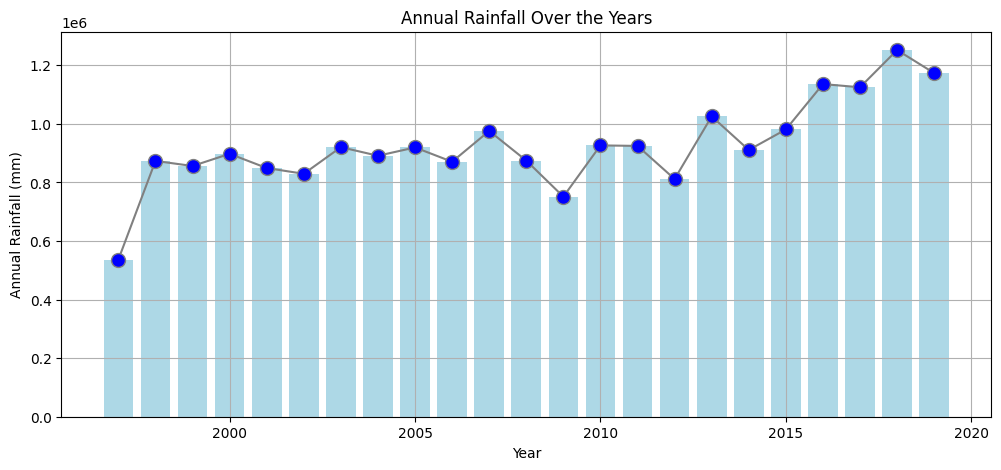

In [ ]:
# Plotting graph of Annual Rainfall over the Years
plt.figure(figsize=(12, 5))
x=annual_data.index
y=annual_data['Annual_Rainfall']
plt.bar(x,y, color='lightblue', label='Production')
plt.plot(x, y, color='gray' , linestyle='solid', marker='o', markersize=10, markerfacecolor='blue')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.title('Annual Rainfall Over the Years')
plt.grid(True)
plt.show()

## Observation from graph

This graphs shows that there is a gradual increase in rainfall, reaching a peak around 2019-2020. Overall, the trend indicates a slight increase in annual rainfall over the years.









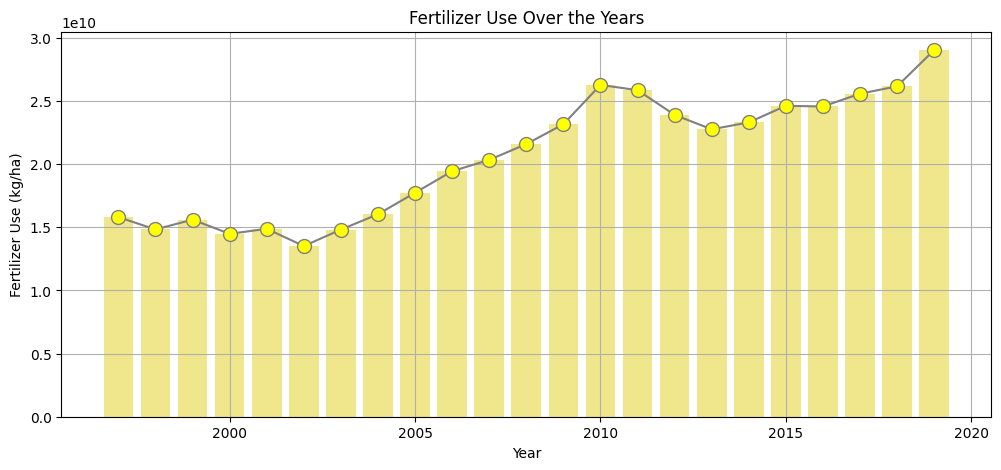

In [ ]:
# Plotting graph of use of Fertilizer over the Years
plt.figure(figsize=(12, 5))
x=annual_data.index
y=annual_data['Fertilizer']
plt.bar(x,y, color='khaki', label='Production')
plt.plot(x, y, color='gray' , linestyle='solid', marker='o', markersize=10, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Fertilizer Use (kg/ha)')
plt.title('Fertilizer Use Over the Years')
plt.grid(True)
plt.show()


## Observation from graph
This graphs shows a high increase in the usage of fertilizer over the years.It indicates efforts to boost crop yields and improve soil productivity. This increase could be due to rising agricultural demands and advancements in farming techniques.

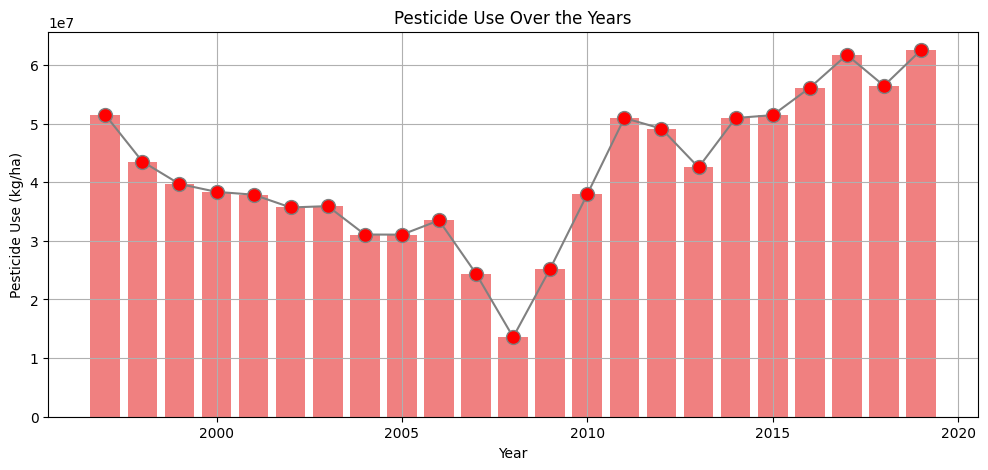

In [ ]:
# Plotting graph of use of Pesticides over the Years
plt.figure(figsize=(12, 5))
x=annual_data.index
y=annual_data['Pesticide']
plt.style.use('default')
plt.bar(x,y, color='lightcoral', label='Production')
plt.plot(x, y, color='gray' , linestyle='solid', marker='o', markersize=10, markerfacecolor='red')
plt.xlabel('Year')
plt.ylabel('Pesticide Use (kg/ha)')
plt.title('Pesticide Use Over the Years')
plt.grid(True)
plt.show()

## Observation from graph

 It shows a steady increase from 2008 onwards. This rise continues with some fluctuations, peaking in 2018 and 2020. Overall, there is a growing reliance on pesticides in recent years, reflecting changes in agricultural practices or pest management needs.









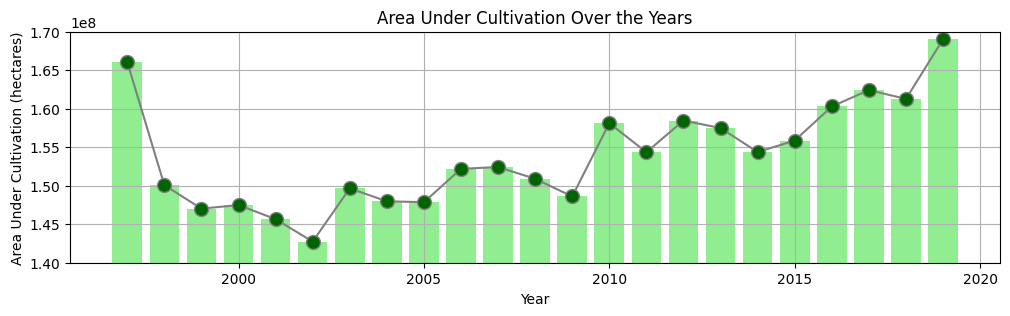

In [ ]:
# Plotting graph of Area under cultivation over the Years
plt.figure(figsize=(12, 3))
x=annual_data.index
y=annual_data['Area']
plt.bar(x, y, color='lightgreen', label='Production')
plt.ylim(140000000,170000000)
plt.plot(x, y, color='gray' , linestyle='solid', marker='o', markersize=10, markerfacecolor='darkgreen')
plt.xlabel('Year')
plt.ylabel('Area Under Cultivation (hectares)')
plt.title('Area Under Cultivation Over the Years')
plt.grid(True)
plt.show()

## Observation from graph

The area used for farming has grown a lot. This might have happened because more fertilizers and better irrigation are being used, turning land that was not previously farmed into productive fields.

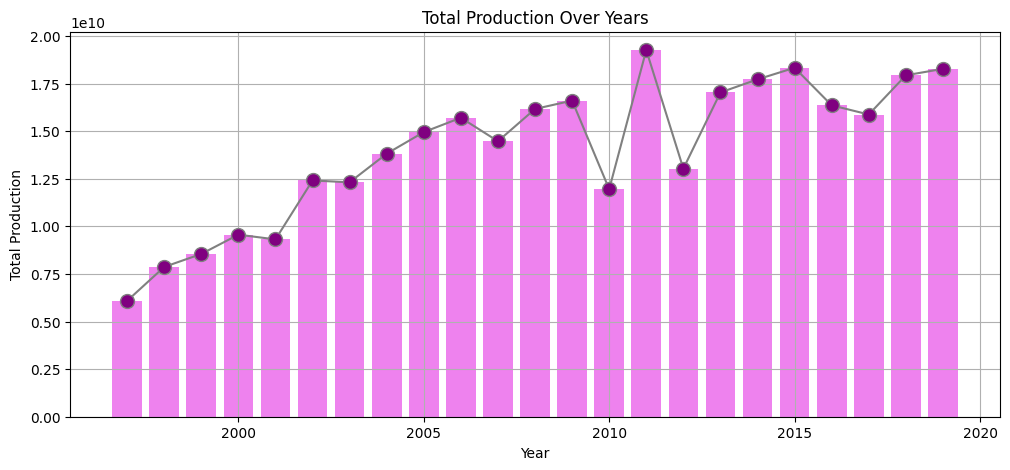

In [ ]:
# Plotting graph of Total Production over the Years
plt.figure(figsize=(12, 5))
x=annual_data.index
y=annual_data['Production']
plt.bar(x,y, color='violet', label='Production')
plt.plot(x, y, color='gray', linestyle='solid', marker='o', markersize=10, markerfacecolor='purple')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.title('Total Production Over Years')
plt.grid(True)
plt.show()

## Observation from graph
The graph shows an overall increase in total production from 1998 to 2020, with a steady rise until 2008, a sharp decline and spike around 2009-2011, and fluctuations stabilizing in the later years. Production levels remain relatively high after 2015, indicating sustained growth despite earlier volatility.

## **Seasonwise Analysis**

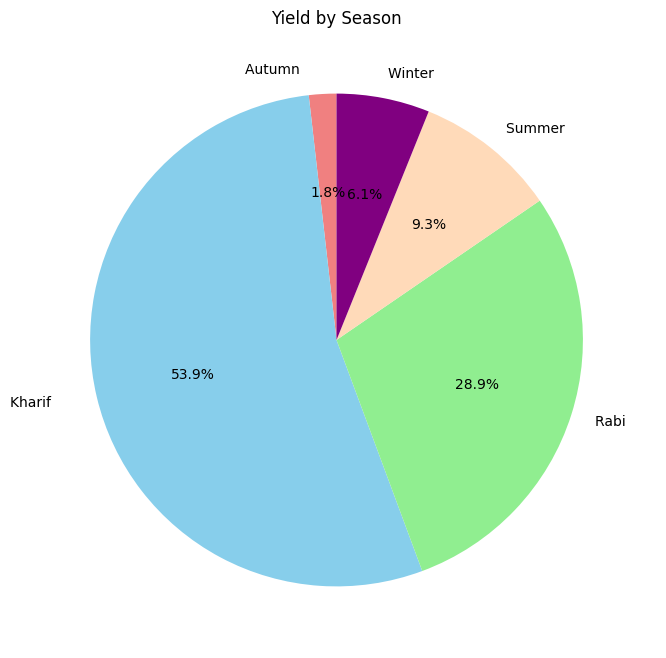

In [ ]:
# Plotting pie chart of Yield by Season
df_Seas = dataf[dataf['Season']!='Whole Year ']

df_season = df_Seas.groupby('Season').sum()
df_season
plt.figure(figsize=(8, 8))
colors=['lightcoral', 'skyblue', 'lightgreen', 'peachpuff','purple']
plt.pie(df_season['Yield'], labels=df_season.index,colors=colors,autopct='%1.1f%%', startangle=90)
plt.title('Yield by Season')
plt.show()

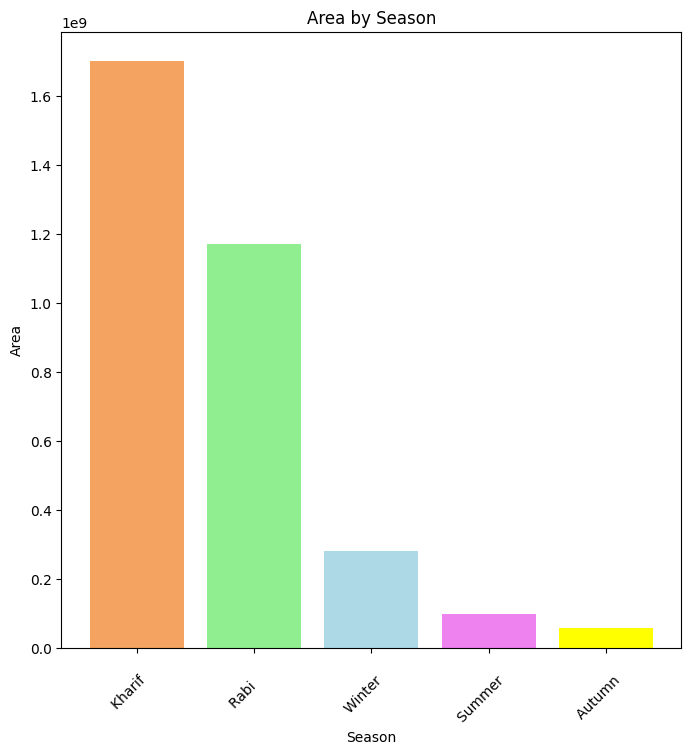

In [ ]:
# Plotting graph of Area used for the cultivation by Season
plt.figure(figsize=(8, 8))
df_season_sorted = df_season.sort_values(by='Area', ascending=False)
colors = ['sandybrown', 'lightgreen', 'lightblue', 'violet', 'yellow']
plt.bar(df_season_sorted.index,df_season_sorted['Area'],color=colors[:len(df_season_sorted)])
plt.xlabel('Season')
plt.ylabel('Area')
plt.title('Area by Season')
plt.xticks(rotation=45)
plt.show()

# **Observations from graph**

* The area under cultivation is the largest during the Kharif season, followed by the Rabi season.
* Crops grown in autumn and summer cover relatively smaller areas.
* In India, the yield is the highest during the Kharif season



## **Cropwise Analysis**

In [ ]:
# filtering where yield is more than zero
df_ynz = dataf[dataf['Yield']>0]
df_crop = df_ynz.groupby('Crop').sum()
df_crop

,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop,,,,,,,,,
Arecanut,253044,Whole Year Whole Year Whole Year Whole Year Wh...,AssamKarnatakaKeralaMeghalayaWest BengalAssamG...,8.756417e+06,39124831,3.005663e+05,1.225295e+09,2.446979e+06,2.789433e+02
Arhar/Tur,823618,Kharif Kharif Whole Year Kharif Kh...,AssamKarnatakaWest BengalAssamKarnatakaWest Be...,8.231787e+07,60881617,5.021373e+05,1.120535e+10,2.279770e+07,3.425058e+02
Bajra,727112,Kharif Kharif Kharif Rabi Kh...,KarnatakaKarnatakaAndhra PradeshAndhra Pradesh...,9.331827e+07,117895328,3.375107e+05,1.204579e+10,2.464871e+07,6.204090e+02
Banana,437881,Whole Year Whole Year Whole Year Whole Year Wh...,MeghalayaAssamGoaKeralaMeghalayaAssamGoaKerala...,7.120036e+06,226274333,3.822509e+05,9.796391e+08,1.914861e+06,6.048228e+03
Barley,467843,Whole Year Rabi Rabi Rabi Ra...,West BengalWest BengalWest BengalWest BengalWe...,9.251378e+06,19478650,2.604054e+05,1.187882e+09,2.466813e+06,3.893536e+02
Black pepper,160785,Kharif Whole Year Whole Year Whole Year Wh...,KarnatakaKeralaKarnatakaKeralaKeralaKarnatakaK...,4.342260e+06,2086898,1.551568e+05,5.671505e+08,1.145154e+06,7.800285e+01
Cardamom,136536,Whole Year Whole Year Whole Year Whole Year Wh...,KarnatakaKarnatakaKeralaWest BengalKeralaWest ...,1.303384e+06,253095,1.163034e+05,1.711876e+08,3.430076e+05,6.895040e+00
Cashewnut,217075,Whole Year Whole Year Whole Year Whole Year Wh...,KeralaGoaKeralaGoaKeralaAndhra PradeshGoaKeral...,7.468989e+06,3735111,2.237581e+05,1.004909e+09,2.002898e+06,4.016237e+02
Castor seed,363505,Kharif Kharif Kharif Kharif Kh...,AssamKarnatakaAssamAndhra PradeshAssamKarnatak...,1.656855e+07,24031597,1.936538e+05,2.244223e+09,4.552137e+06,1.277706e+02


**Fertilizer in different crops**

In [ ]:
# Plotting graph of Use of Fertilizers used on different Crops
fig = go.Figure()
# Plotting  bar chart
fig.add_trace(go.Bar(
    x=df_crop.index,
    y=df_crop['Fertilizer'],
    name='Fertilizer',
    marker_color='lightblue'
))

# Plotting line chart
fig.add_trace(go.Scatter(
    x=df_crop.index,
    y=df_crop['Fertilizer'],
    mode='lines+markers',
    line=dict(color='red', dash='dash'),
    marker=dict(color='cyan', size=10),
    name='Trend'
))

# Updating layout
fig.update_layout(
    title='Use of Fertilizer in Different Crops',
    xaxis_title='Crops',
    yaxis_title='Fertilizer',
    xaxis_tickangle=-30
)
fig.show()

In [ ]:
# Sorting the DataFrame by 'Fertilizer' in descending order
sorted_df_crop = df_crop.sort_values(by='Fertilizer', ascending=False)

# Filtering the top 5 crops
top_5_crops = sorted_df_crop.head(5)

# Creating a bar chart with Plotly for top 5 crops
fig_top_5 = go.Figure()

# Plotting bar chart for top 5 crops
fig_top_5.add_trace(go.Bar(
    x=top_5_crops.index,
    y=top_5_crops['Fertilizer'],
    name='Fertilizer',
    marker_color='teal'
))

# Updating layout
fig_top_5.update_layout(
    title='Top 5 Crops by Fertilizer Usage',
    xaxis_title='Crops',
    yaxis_title='Fertilizer',
    xaxis_tickangle=-30
)

# Show the figure
fig_top_5.show()

In [ ]:
# Filtering the bottom 5 crops
bottom_5_crops = sorted_df_crop.tail(5)

# Creating a bar chart with Plotly for bottom 5 crops
fig_bottom_5 = go.Figure()

# Plotting bar chart for bottom 5 crops
fig_bottom_5.add_trace(go.Bar(
    x=bottom_5_crops.index,
    y=bottom_5_crops['Fertilizer'],
    name='Fertilizer',
    marker_color='teal'
))

# Updating layout
fig_bottom_5.update_layout(
    title='Bottom 5 Crops by Fertilizer Usage',
    xaxis_title='Crops',
    yaxis_title='Fertilizer',
    xaxis_tickangle=-30
)

# Show the figure
fig_bottom_5.show()

# **Observations from graph**

* Rice,Wheat and cotton have the highest fertilizer usage.
* Crops like Cardamom,other oilseeds,Sweet potato and other summer pulses have the lowest fertilizer usage.

**Area under Cultivation in different crops**

In [ ]:
# PLotting graph of Area under Cultivation in different crops
fig = go.Figure()

# Plotting bar chart
fig.add_trace(go.Bar(
    x=df_crop.index,
    y=df_crop['Area'],
    name='Area',
    marker_color='lightblue'
))

# Plotting line chart
fig.add_trace(go.Scatter(
    x=df_crop.index,
    y=df_crop['Area'],
    mode='lines+markers',
    line=dict(color='red', dash='dash'),
    marker=dict(color='cyan', size=10),
    name='Trend'
))

# Updating layout
fig.update_layout(
    title='Area under cultivation in Different Crops',
    xaxis_title='Crops',
    yaxis_title='Area under cultivation',
    xaxis_tickangle=-30
)
fig.show()

In [ ]:
# Sorting the DataFrame by 'Area' in descending order
sorted_df_crop = df_crop.sort_values(by='Area', ascending=False)

# Filtering the top 5 crops
top_5_crops = sorted_df_crop.head(5)

# Creating a bar chart with Plotly for top 5 crops
fig_top_5 = go.Figure()

# Plotting bar chart
fig_top_5.add_trace(go.Bar(
    x=top_5_crops.index,
    y=top_5_crops['Area'],
    name='Area',
    marker_color='lightblue'
))

# Updating layout
fig_top_5.update_layout(
    title='Top 5 Crops by Area under Cultivation',
    xaxis_title='Crops',
    yaxis_title='Area under Cultivation',
    xaxis_tickangle=-30
)

fig_top_5.show()

In [ ]:
#Plotting graph for bottom 5 crops by Area under Cultivation
bottom_5_crops = sorted_df_crop.tail(5)

# Creating a bar chart with Plotly for bottom 5 crops
fig_bottom_5 = go.Figure()

# Plotting bar chart
fig_bottom_5.add_trace(go.Bar(
    x=bottom_5_crops.index,
    y=bottom_5_crops['Area'],
    name='Area',
    marker_color='lightblue'
))

#Updating Layout
fig_bottom_5.update_layout(
    title='Bottom 5 Crops by Area under Cultivation',
    xaxis_title='Crops',
    yaxis_title='Area under Cultivation',
    xaxis_tickangle=-30
)
fig_bottom_5.show()

# **Observations from graph**

* Rice,Wheat and cotton have the highest area under cultivation
* Crops like Cardamom,sweet potato,other oilseeds and other summer pulses have the lowest area under cultivation.


**Production of different crops**

In [ ]:
#Plotting graph for Production of different crops
fig = go.Figure()

# plotting bar chart for Production
fig.add_trace(go.Bar(
    x=df_crop.index,
    y=df_crop['Production'],
    name='Production',
    marker_color='lightblue'
))

#plotting line chart for Production
fig.add_trace(go.Scatter(
    x=df_crop.index,
    y=df_crop['Production'],
    mode='lines+markers',
    line=dict(color='red', dash='dash'),
    marker=dict(color='cyan', size=10),
    name='Trend'
))

#Updating layout
fig.update_layout(
    title='Production of Different Crops',
    xaxis_title='Crops',
    yaxis_title='Production',
    xaxis_tickangle=-30
)
fig.show()

In [ ]:
# Plotting Graph for Top 5 crops by Production
sorted_df_crop = df_crop.sort_values(by='Production', ascending=False)

# Filtering the top 5 crops
top_5_crops = sorted_df_crop.head(5)

# Creating a bar chart for the top 5 crops
fig_top_5 = go.Figure()

# Plotting bar chart for Production of Top 5 Crops
fig_top_5.add_trace(go.Bar(
    x=top_5_crops.index,
    y=top_5_crops['Production'],
    name='Production',
    marker_color='Peru'
))

#Updating Layout
fig_top_5.update_layout(
    title='Top 5 Crops by Production',
    xaxis_title='Crops',
    yaxis_title='Production',
    xaxis_tickangle=-30
)
fig_top_5.show()

In [ ]:
#Plotting Graph for Bottom 5 Crops by Production
#Filtering Bottom 5 Crops
bottom_5_crops = sorted_df_crop.tail(5)

# Creating a bar chart for the bottom 5 crops
fig_bottom_5 = go.Figure()

# Plotting bar chart for Production of Bottom 5 Crops
fig_bottom_5.add_trace(go.Bar(
    x=bottom_5_crops.index,
    y=bottom_5_crops['Production'],
    name='Production',
    marker_color='Peru'
))

#updaing Layout
fig_bottom_5.update_layout(
    title='Bottom 5 Crops by Production',
    xaxis_title='Crops',
    yaxis_title='Production',
    xaxis_tickangle=-30
)
fig_bottom_5.show()

# **Observations from graph**

*   
Coconut and sugarcane have the highest production
* Moth,Lobia,and other summer pulses have the lowest production

## **Statewise Analysis**

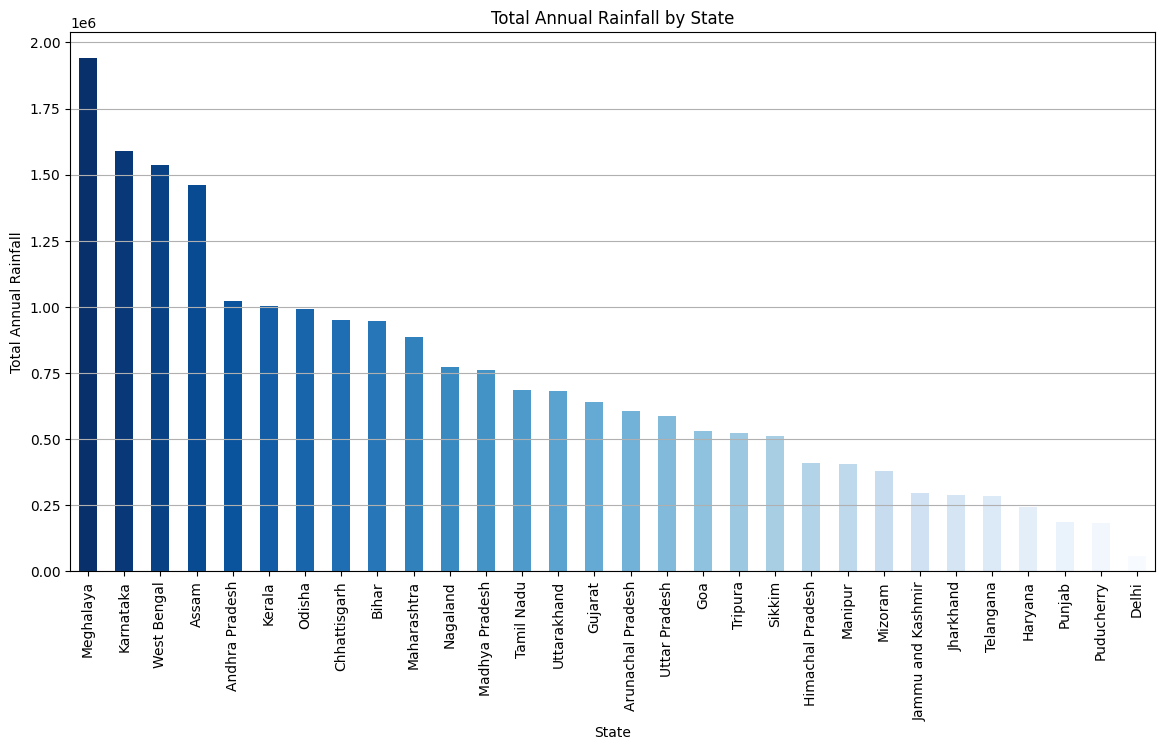

In [ ]:
#Plotting graph of Statewise Annual rainfall
state_rainfall = dataf.groupby('State')['Annual_Rainfall'].sum().sort_values(ascending=False)

num_states = len(state_rainfall)
colormap = plt.cm.Blues_r
colors = colormap(np.linspace(0, 1, len(state_rainfall)))
ax = state_rainfall.plot(kind='bar', figsize=(14, 7), color=colors)
plt.xlabel('State')
plt.ylabel('Total Annual Rainfall')
plt.title('Total Annual Rainfall by State')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

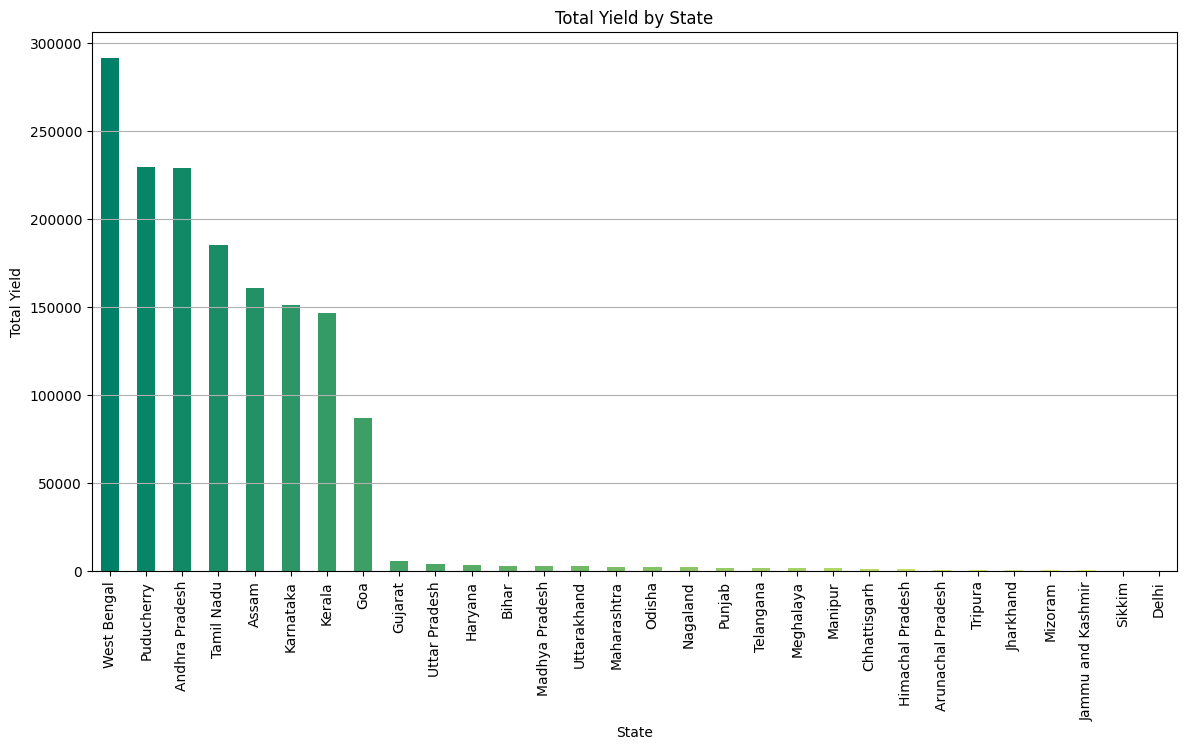

In [ ]:
#Plotting graph of Statewise Total Yield by State
state_yield = dataf.groupby('State')['Yield'].sum().sort_values(ascending=False)

num_states = len(state_yield)
colormap = plt.cm.summer
colors = colormap(np.linspace(0, 1, len(state_yield)))
ax = state_yield.plot(kind='bar', figsize=(14, 7), color=colors)
plt.xlabel('State')
plt.ylabel('Total Yield')
plt.title('Total Yield by State')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

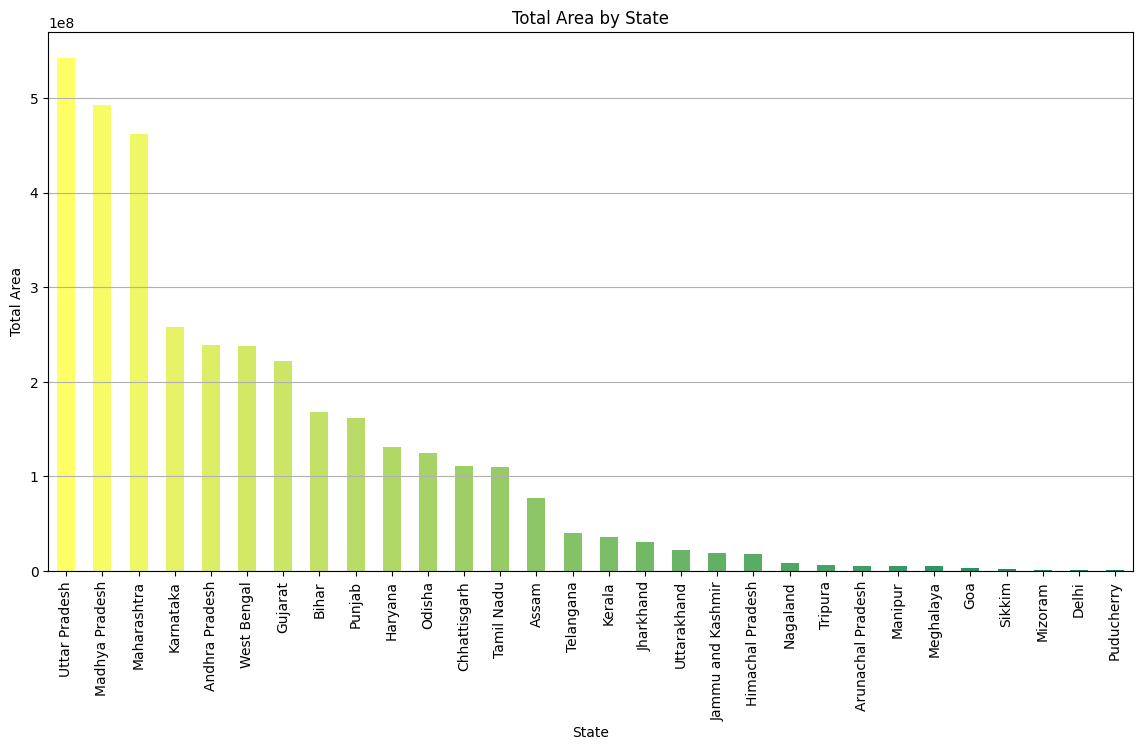

In [ ]:
#Plotting graph of Statewise Total Area by State
state_area = dataf.groupby('State')['Area'].sum().sort_values(ascending=False)

num_states = len(state_area)
colormap = plt.cm.summer_r
colors = colormap(np.linspace(0, 1, len(state_area)))
ax = state_area.plot(kind='bar', figsize=(14, 7), color=colors)
plt.xlabel('State')
plt.ylabel('Total Area')
plt.title('Total Area by State')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

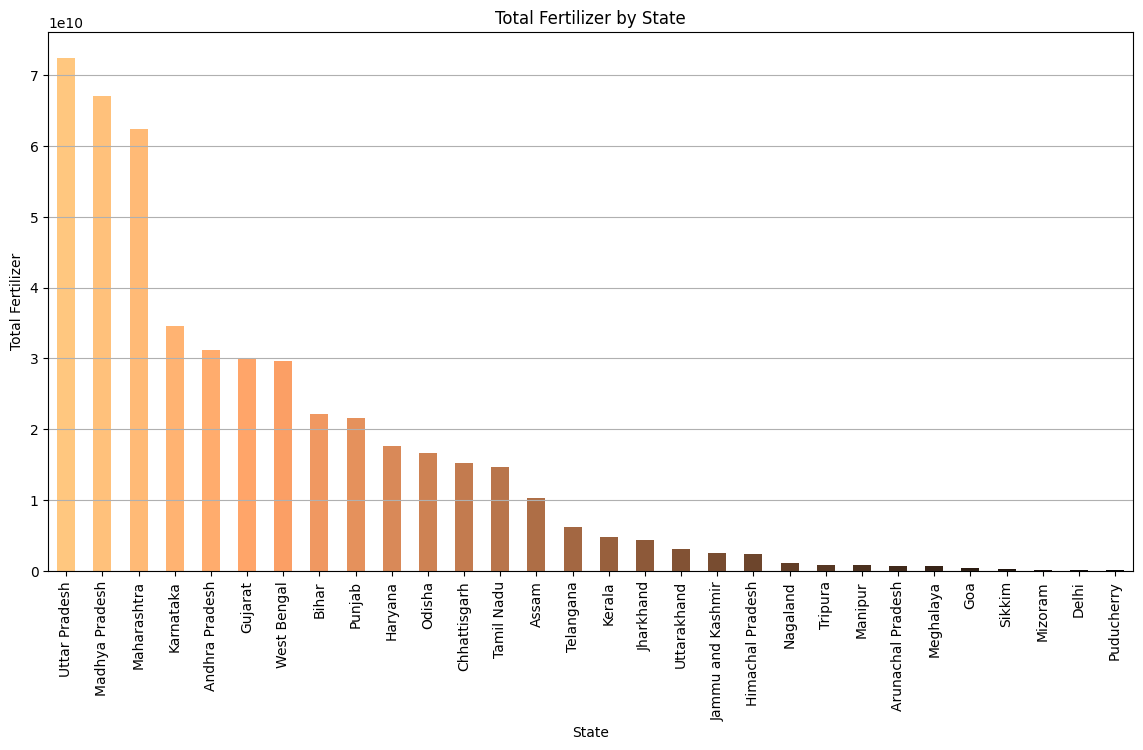

In [ ]:

#Plotting graph of Statewise Total Fertilizer by State
state_fertilizer = dataf.groupby('State')['Fertilizer'].sum().sort_values(ascending=False)

num_states = len(state_fertilizer)
colormap = plt.cm.copper_r
colors = colormap(np.linspace(0, 1, len(state_fertilizer)))
ax = state_fertilizer.plot(kind='bar', figsize=(14, 7), color=colors)
plt.xlabel('State')
plt.ylabel('Total Fertilizer')
plt.title('Total Fertilizer by State')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

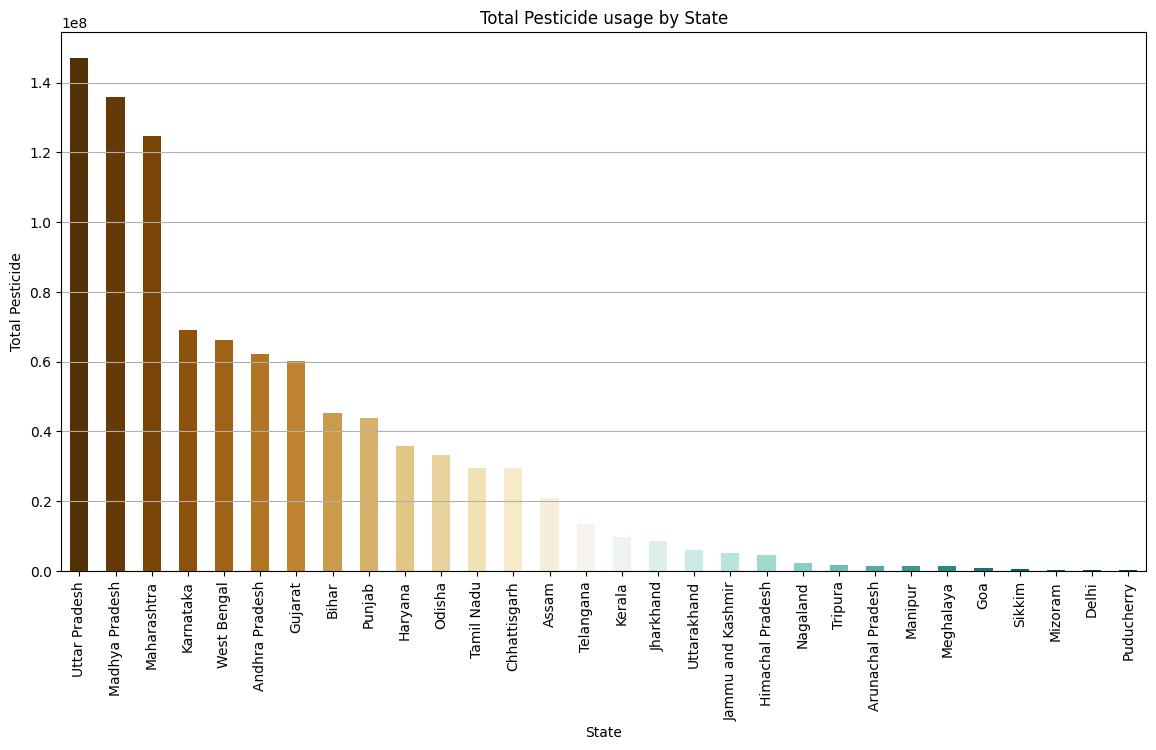

In [ ]:
#Plotting graph of Statewise Total Pesticide usage by State
state_pesticide = dataf.groupby('State')['Pesticide'].sum().sort_values(ascending=False)

num_states = len(state_pesticide)
colormap = plt.cm.BrBG
colors = colormap(np.linspace(0, 1, len(state_pesticide)))
ax = state_pesticide.plot(kind='bar', figsize=(14, 7), color=colors)
plt.xlabel('State')
plt.ylabel('Total Pesticide')
plt.title('Total Pesticide usage by State')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

# **Observations from graphs**

*   
Karnataka experiences the highest annual rainfall; however, it does not have the highest yield.
* In contrast, West Bengal leads in yield.
*  States like Uttar Pradesh, Haryana, and Maharashtra have high area under cultivation.
* States like Uttar Pradesh, Haryana, and Maharashtra are applying a large amount of fertilizer and high amout of pesticides, yet their yields remain low, likely due to insufficient annual rainfall.









## Area vs Yield Correlation plot

In [ ]:
#Filtering data for plotting correaltions
crop_column = 'Crop'

# Filtering the unique crop names
unique_crops = dataf[crop_column].unique()

# Creating a dictionary to hold the DataFrames for each crop
crop_dfs = {}

# Iterating through each unique crop and create a separate DataFrame
for crop in unique_crops:
    crop_dfs[crop] = dataf[dataf[crop_column] == crop]

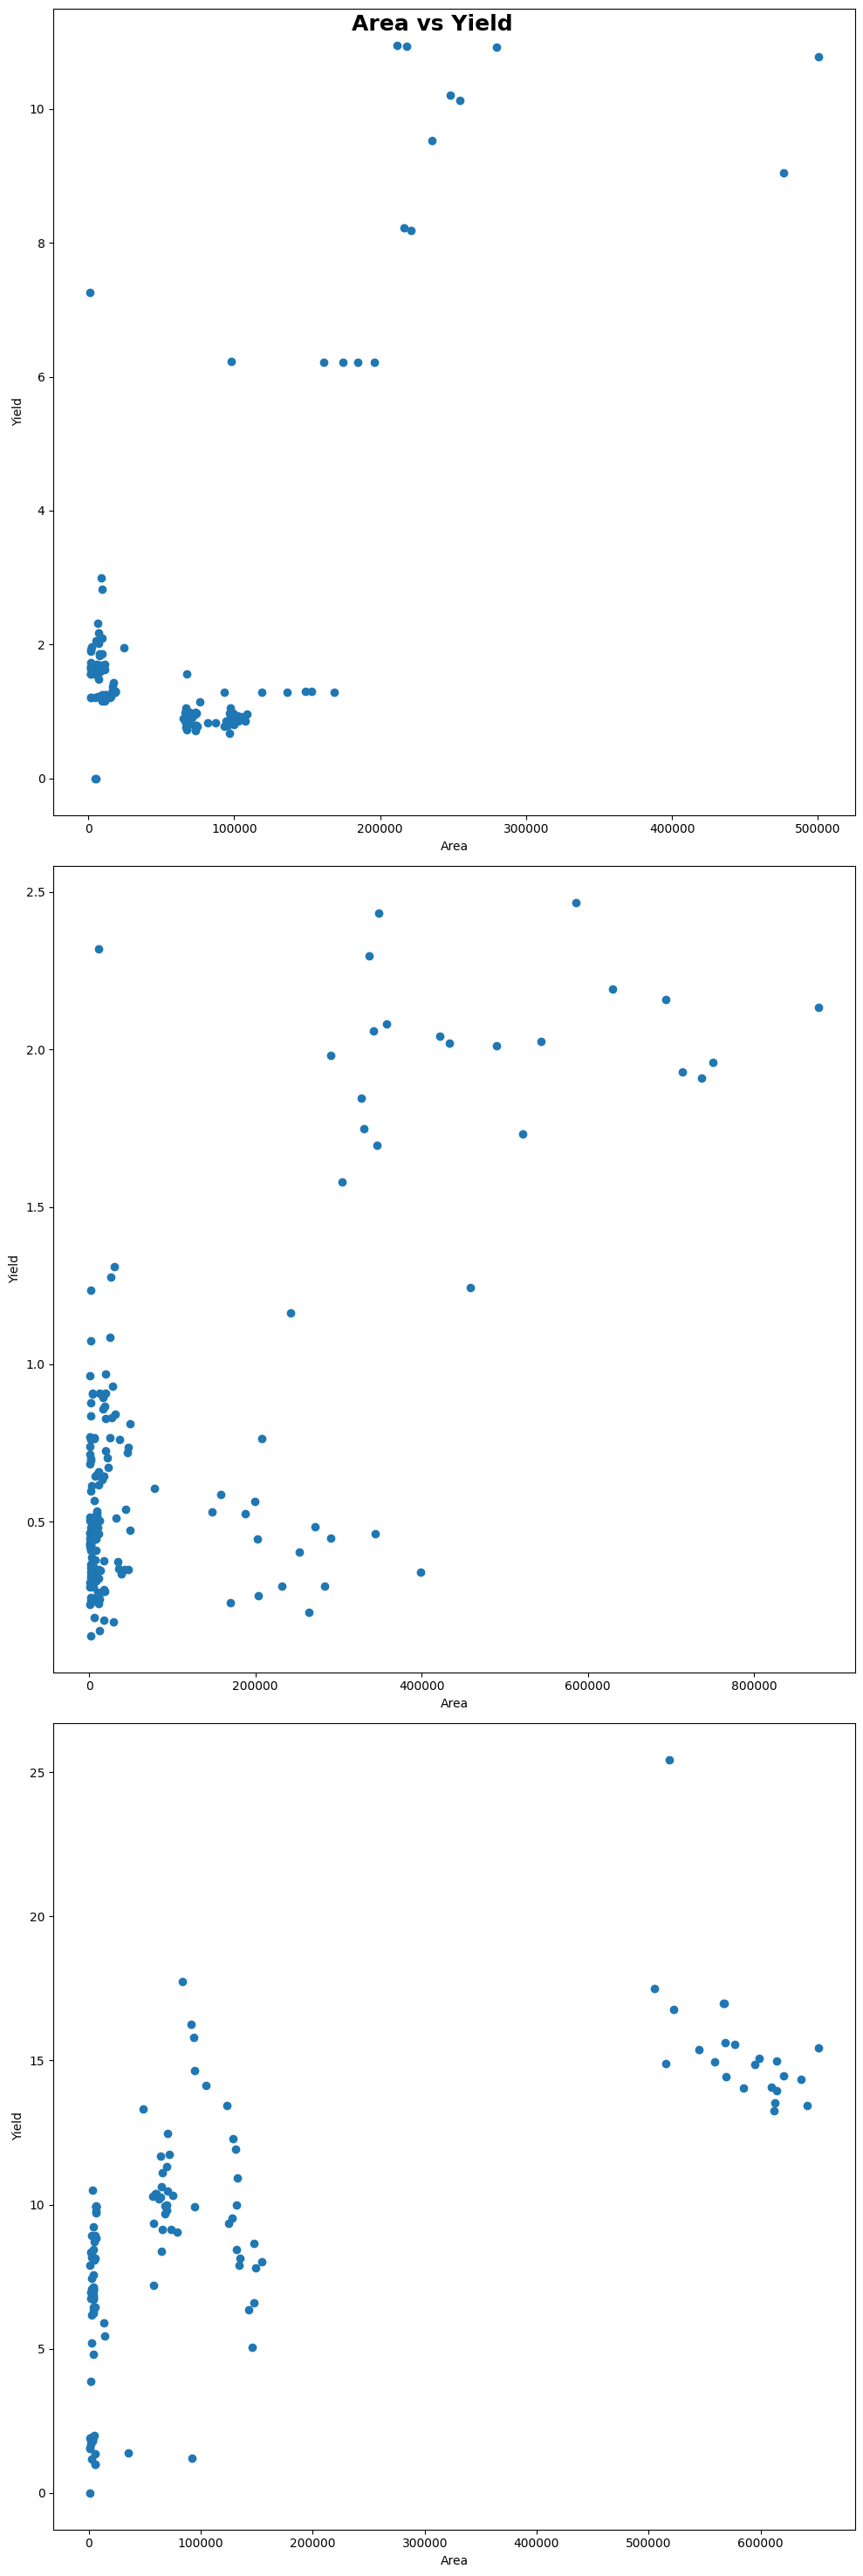

In [ ]:
#Plotting graph of Correaltions of crops by area vs yield
arecanut_df = crop_dfs['Arecanut']
castor_df = crop_dfs["Castor seed"]
jute_df = crop_dfs["Jute"]

fig1, (ax1, ax2, ax3)  = plt.subplots(nrows=3,
                                     ncols=1,
                                     figsize=(10, 30))

ax1.scatter(arecanut_df["Area"],arecanut_df["Yield"]);
ax2.scatter(castor_df["Area"],castor_df["Yield"]);
ax3.scatter(jute_df["Area"],jute_df["Yield"]);

ax1.set(xlabel="Area",
       ylabel="Yield");
ax2.set(xlabel="Area",
       ylabel="Yield");
ax3.set(xlabel="Area",
       ylabel="Yield");

fig1.suptitle("Area vs Yield", fontsize="18", fontweight="bold");

plt.tight_layout();

In [ ]:
#Claculating Correaltions
arecanut_area_corr = arecanut_df["Area"].corr(arecanut_df["Yield"])
castor_area_corr = castor_df["Area"].corr(castor_df["Yield"])
jute_area_corr = jute_df["Area"].corr(jute_df["Yield"])
arecanut_area_corr, castor_area_corr, jute_area_corr

(0.7117847668961311, 0.7361623896011609, 0.6896394427986953)

## Fertilizer vs Yield Correlation plot

---



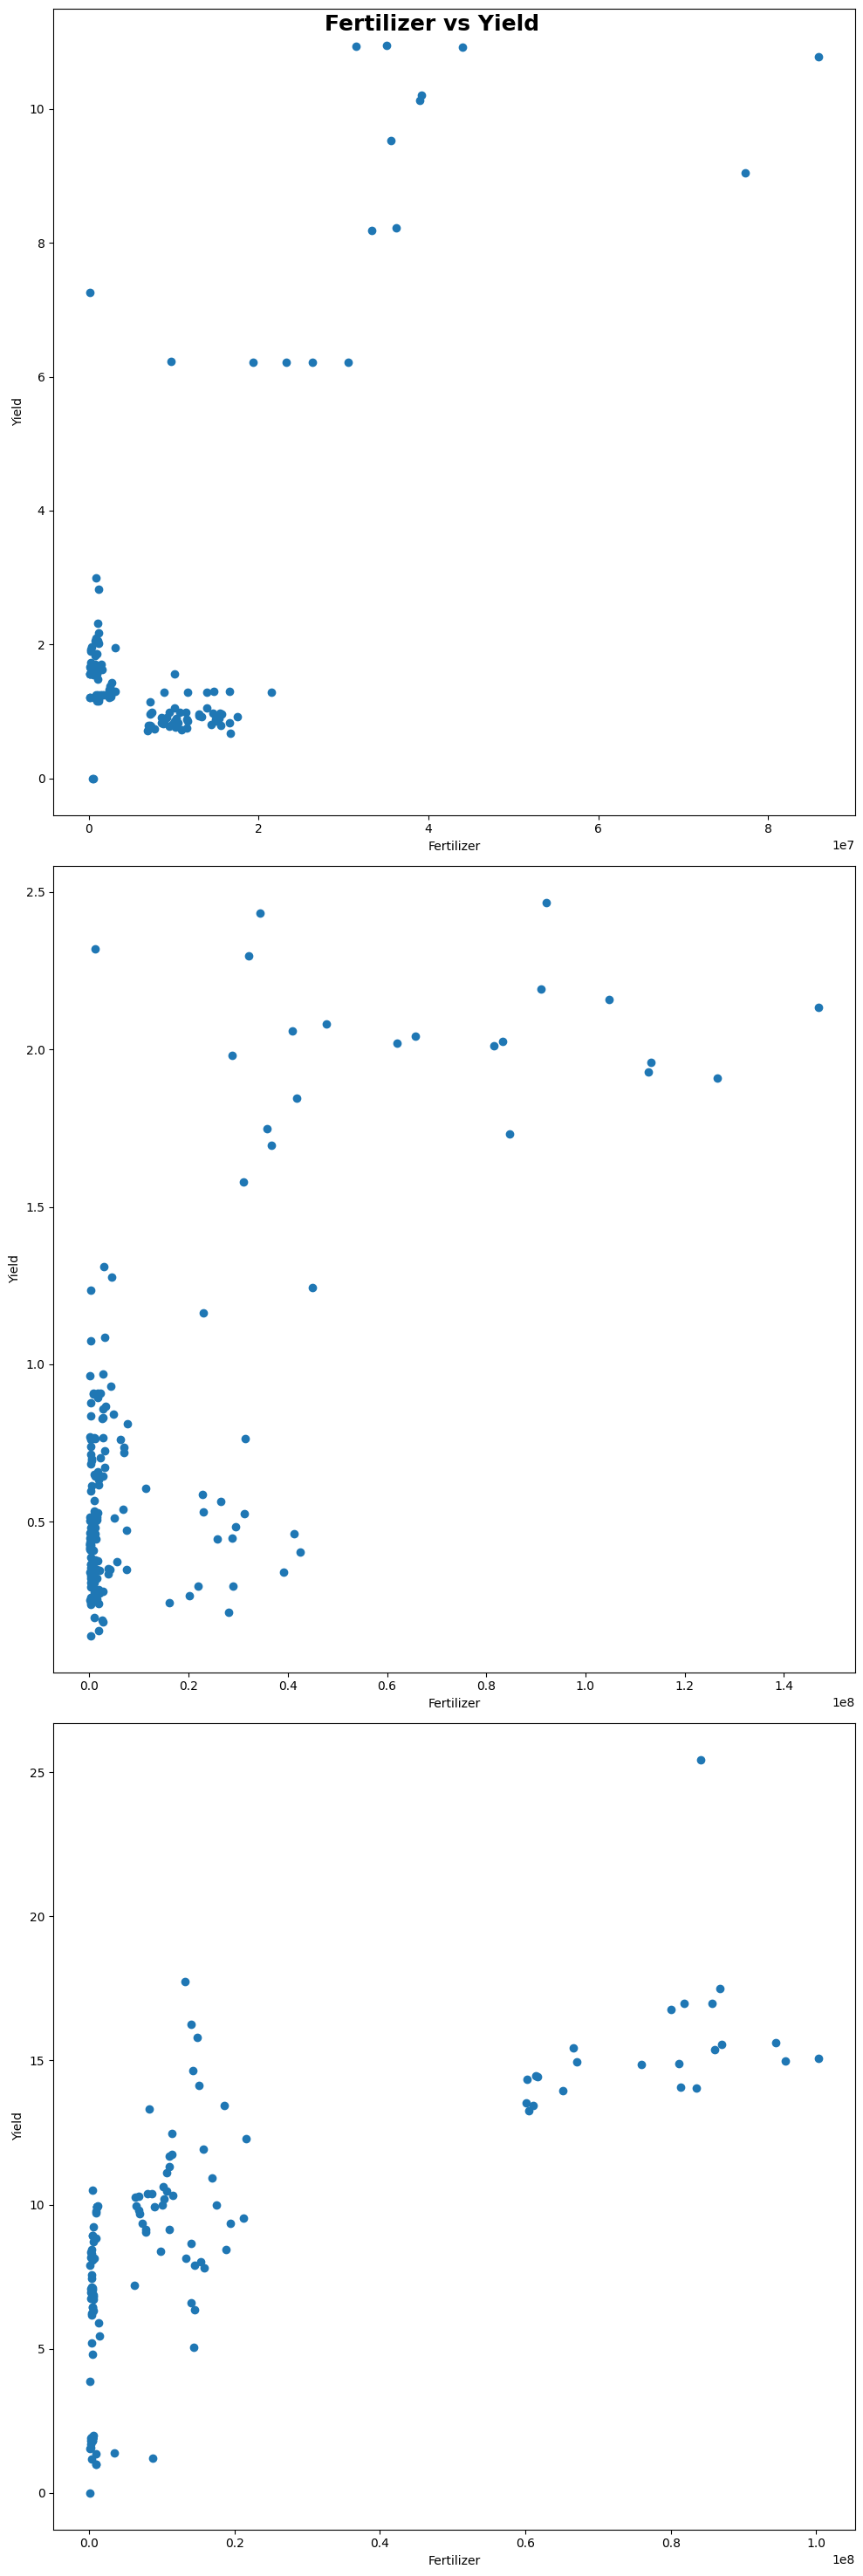

In [ ]:
#Plotting graph of Correaltions of crops by Fertilizers vs Yield
fig2, (ax1, ax2, ax3)  = plt.subplots(nrows=3,
                                     ncols=1,
                                     figsize=(10, 30))

ax1.scatter(arecanut_df["Fertilizer"],arecanut_df["Yield"]);
ax2.scatter(castor_df["Fertilizer"],castor_df["Yield"]);
ax3.scatter(jute_df["Fertilizer"],jute_df["Yield"]);

ax1.set(xlabel="Fertilizer",
       ylabel="Yield");
ax2.set(xlabel="Fertilizer",
       ylabel="Yield");
ax3.set(xlabel="Fertilizer",
       ylabel="Yield");

fig2.suptitle("Fertilizer vs Yield", fontsize="18", fontweight="bold");

plt.tight_layout();

In [ ]:
#Calculating Correaltions
arecanut_fertilizer_corr = arecanut_df["Fertilizer"].corr(arecanut_df["Yield"])
castor_fertilizer_corr = castor_df["Fertilizer"].corr(castor_df["Yield"])
jute_fertilizer_corr = jute_df["Fertilizer"].corr(jute_df["Yield"])
arecanut_fertilizer_corr, castor_fertilizer_corr, jute_fertilizer_corr

(0.7401778419213146, 0.7248928991615708, 0.7166367581517279)

## Pesticide vs Yield Correlation plot

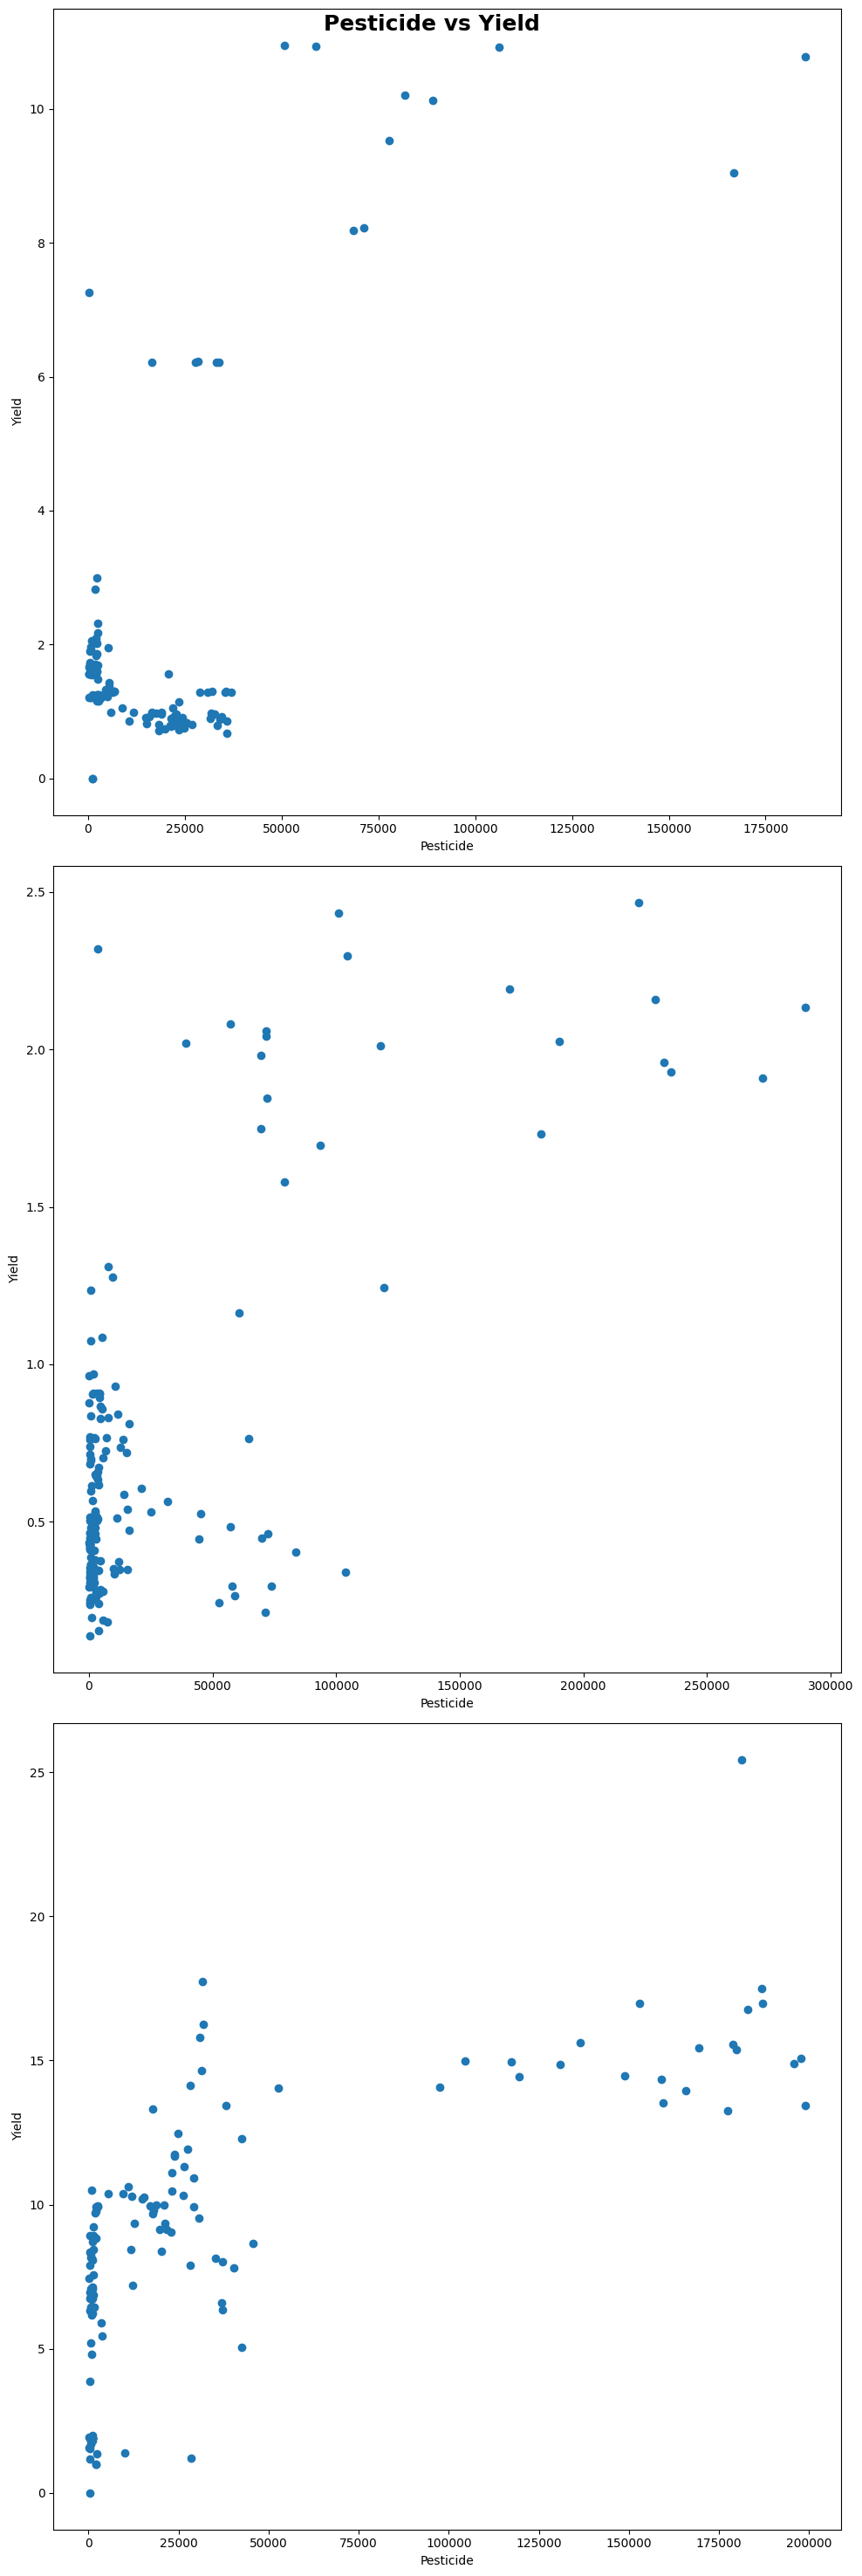

In [ ]:
#Plotting graph of Correaltions of crops by Pesticides vs Yield
fig3, (ax1, ax2, ax3)  = plt.subplots(nrows=3,
                                     ncols=1,
                                     figsize=(10, 30))

ax1.scatter(arecanut_df["Pesticide"],arecanut_df["Yield"]);
ax2.scatter(castor_df["Pesticide"],castor_df["Yield"]);
ax3.scatter(jute_df["Pesticide"],jute_df["Yield"]);

ax1.set(xlabel="Pesticide",
       ylabel="Yield");
ax2.set(xlabel="Pesticide",
       ylabel="Yield");
ax3.set(xlabel="Pesticide",
       ylabel="Yield");

fig3.suptitle("Pesticide vs Yield", fontsize="18", fontweight="bold");

plt.tight_layout();

In [ ]:
#Calculating Correaltions
arecanut_pesticide_corr = arecanut_df["Pesticide"].corr(arecanut_df["Yield"])
castor_pesticide_corr = castor_df["Pesticide"].corr(castor_df["Yield"])
jute_pesticide_corr = jute_df["Pesticide"].corr(jute_df["Yield"])
arecanut_pesticide_corr, castor_pesticide_corr, jute_pesticide_corr

(0.7034672524182729, 0.7008592673466081, 0.6985126677030096)

### **Regression Analysis**

In [ ]:
#Importing libraries for Modelling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV  # Ensure cross_val_score is imported
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, median_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [ ]:
X = dataf.drop("Yield", axis=1)
y = dataf["Yield"]

In [ ]:
# turning the categorical features into numericals using OneHotEncoder
# scaling the numerical data using StandardScaler

categorical_features = ['Crop', 'Season', 'State', 'Crop_Year']
numerical_features = ["Area", "Production", "Annual_Rainfall", "Fertilizer", "Pesticide"]

one_hot = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
std_sca = StandardScaler()

transformer = ColumnTransformer([("One_hot", one_hot, categorical_features),
                                 ("std_sca", std_sca, numerical_features)],
                                  remainder="passthrough")

### Train-Validation-Test Split (80:10:10)

In [ ]:
#Splitting off the test set (10% of the total data)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#Splitting the remaining data into training set (80% of total) and validation set (10% of total)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1111, random_state=42)
# 80% * 0.1111 = 10% (validation)

### Model Selection

Three models: Linear Regression, Random Forest, and Ridge Regression

In [ ]:
# Defining  pipelines of models
# a) Linear Regression
linear_pipeline = Pipeline(steps=[
            ("preprocessor", transformer),
            ("regressor", LinearRegression())
])

# b) Random Forest Regressor
rf_pipeline = Pipeline(steps=[
    ("preprocessor", transformer),
    ("model", RandomForestRegressor(n_estimators = 100, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 20))
    ])

# c) Ridge Regression
ridge_pipeline = Pipeline(steps=[
    ("preprocessor", transformer),
    ("regressor", Ridge(alpha= 0.1, solver = 'sparse_cg'))
])

### Training

Fit all three models on the training data

In [ ]:
#Creating Pipeline for Linear Regression
linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Crop', 'Season', 'State',
                                                   'Crop_Year']),
                                                 ('std_sca', StandardScaler(),
                                                  ['Area', 'Production',
                                                   'Annual_Rainfall',
                                                   'Fertilizer',
                                                   'Pesticide'])])),
                ('regressor', LinearRegression())])

In [ ]:
#Creating Pipeline for Random Forest Regressor
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Crop', 'Season', 'State',
                                                   'Crop_Year']),
                                                 ('std_sca', StandardScaler(),
                                                  ['Area', 'Production',
                                                   'Annual_Rainfall',
                                                   'Fertilizer',
                                                   'Pesticide'])])),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features='sqrt',
                                       min_samples_split=5))])

In [ ]:
#Creating Pipeline for Ridge Regressor
ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Crop', 'Season', 'State',
                                                   'Crop_Year']),
                                                 ('std_sca', StandardScaler(),
                                                  ['Area', 'Production',
                                                   'Annual_Rainfall',
                                                   'Fertilizer',
                                                   'Pesticide'])])),
                ('regressor', Ridge(alpha=0.1, solver='sparse_cg'))])

### Hyperparameter Optimization

In [ ]:
# Tuning HyperParameter for Random Forest Regressor

# Defining the parameter grid
param_grid = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2'],
}


# Choosing Grid Search CV or Randomized Search CV
# grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
# Or
random_search = RandomizedSearchCV(estimator = rf_pipeline,
                                   param_distributions=param_grid,
                                   n_iter=30,  # Reduce iterations to save time
                                   cv=3,  # Reduce cross-validation folds to save computation
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)
# Fitting the model
# grid_search.fit(X_train, y_train)
# Or
random_search.fit(X_train, y_train)

# Filtering the best parameters
# best_params = grid_search.best_params_
# Or
best_params = random_search.best_params_

print(f"Best parameters found: {best_params}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found: {'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 20}


In [ ]:
# Tuning HyperParameter for Ridge Regressor

# Defining the parameter grid
param_grid = {
    'regressor__alpha': [0.1, 1, 10, 100, 1000],
    'regressor__solver': ['auto', 'svd', 'cholesky', 'sparse_cg', 'sag', 'lsqr', 'saga']
}

# Choosing GridSearchCV or RandomizedSearchCV
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
# Or
# random_search = RandomizedSearchCV(Ridge(), param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error')

# Fitting the model
grid_search.fit(X_train, y_train)
# Or
# random_search.fit(X_train, y_train)

# Filtering the best parameters
best_params = grid_search.best_params_
# Or
# best_params = random_search.best_params_

print(f"Best parameters found: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/

Best parameters found: {'regressor__alpha': 1, 'regressor__solver': 'auto'}


### Evaluation

Evaluate all models on the validation set using various metrics

In [ ]:
#Creating function for Evaluation

def evaluate_model(model, X_val, y_val):

    #Predicting the target values using the model and validation features
    y_pred = model.predict(X_val)

    # Calculating Mean Squared Error (MSE) between the actual and predicted values
    mse = mean_squared_error(y_val, y_pred)

    # Calculating Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_val, y_pred)

    # Calculating R-Squared (R2) to determine how well the model explains the variance in the data
    r2 = r2_score(y_val, y_pred)

    # Calculating Median Absolute Error (MedAE) between the actual and predicted values
    medae = median_absolute_error(y_val, y_pred)

    # Adjusted R-squared Accounts for the number of predictors, refining model performance evaluation.
    n = len(y_test)
    p = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    # Perform 5-fold cross-validation on the training data, using MSE as the scoring metric
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"Cross-Validation MSE Scores: {cv_scores}")
    print(f"Average Cross-Validation MSE: {cv_scores.mean()}")


    print("Model Evaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-Squared (R2): {r2}")
    print(f"Median Absolute Error (MedAE): {medae}")
    print(f'Adjusted R-squared: {adj_r2}')


In [ ]:
# Passing the linear regression model through linear_pipeline along with the validation features (X_val) and validation target values (y_val)
print("Linear Regression Model Evaluation:")
evaluate_model(linear_pipeline, X_val, y_val)

Linear Regression Model Evaluation:
Cross-Validation MSE Scores: [-1.15906152e+05 -1.46276738e+05 -1.16595715e+05 -1.51547003e+27
 -9.92210417e+04]
Average Cross-Validation MSE: -3.0309400675323395e+26
Model Evaluation Metrics:
Mean Squared Error (MSE): 127545.15449009015
Mean Absolute Error (MAE): 79.06872683190197
R-Squared (R2): 0.9073366166105786
Median Absolute Error (MedAE): 29.13631579
Adjusted R-squared: 0.9066496557782023


In [ ]:
# Passing the Random Forest Regressor model through rf_pipeline along with the validation features (X_val) and validation target values (y_val)
print("\nRandom Forest Regressor Model Evaluation:")
evaluate_model(rf_pipeline, X_val, y_val)


Random Forest Regressor Model Evaluation:
Cross-Validation MSE Scores: [-27778.83675822 -64168.25974362 -33943.51630202 -13538.8092471
 -26981.58642528]
Average Cross-Validation MSE: -33282.201695249954
Model Evaluation Metrics:
Mean Squared Error (MSE): 7445.584786858323
Mean Absolute Error (MAE): 10.67163724057106
R-Squared (R2): 0.9945906759028098
Median Absolute Error (MedAE): 0.49749150365286954
Adjusted R-squared: 0.9945505738296017


In [ ]:
# Passing the Ridge Regression Model model through ridge_pipeline along with the validation features (X_val) and validation target values (y_val)
print("\nRidge Regression Model Evaluation:")
evaluate_model(ridge_pipeline, X_val, y_val)


Ridge Regression Model Evaluation:
Cross-Validation MSE Scores: [-115719.76045503 -146537.03840805 -116301.79265106  -92870.61294913
  -97520.60086179]
Average Cross-Validation MSE: -113789.96106501056
Model Evaluation Metrics:
Mean Squared Error (MSE): 128192.65900035341
Mean Absolute Error (MAE): 78.33479294890344
R-Squared (R2): 0.9068661953004099
Median Absolute Error (MedAE): 27.497701186290655
Adjusted R-squared: 0.9061757469953883


**Evaluating on test dataset**

In [ ]:
#Testing the best model
print("\nFinal Model (Random Forest) Test Set Evaluation:")
evaluate_model(rf_pipeline, X_test, y_test)


Final Model (Random Forest) Test Set Evaluation:
Cross-Validation MSE Scores: [-20607.15031751 -43857.13078141 -37617.68126172 -16790.07905021
 -21982.11465959]
Average Cross-Validation MSE: -28170.831214087717
Model Evaluation Metrics:
Mean Squared Error (MSE): 31261.513109812215
Mean Absolute Error (MAE): 19.575327528725573
R-Squared (R2): 0.9713922452550938
Median Absolute Error (MedAE): 0.531898437895002
Adjusted R-squared: 0.9711801614060789


### Plotting Training VS Validation
The plot compares the training error and validation error against the number of trees in a Random Forest.

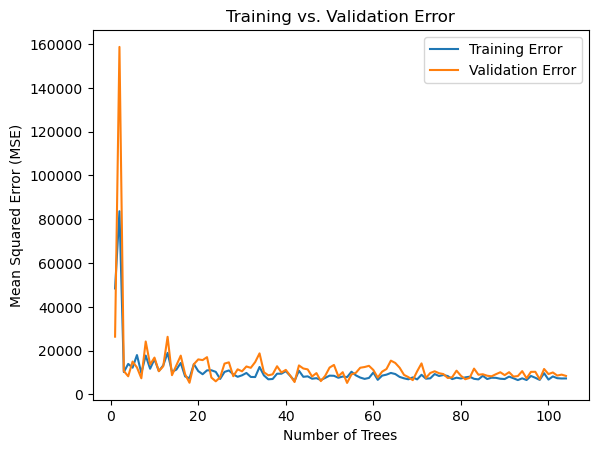

In [ ]:
# Now tracking errors
train_errors = []
val_errors = []
n_estimators = 104

for i in range(1, n_estimators + 1):
    # setting the number of trees
    rf_pipeline.set_params(model__n_estimators=i)

    # training the model
    rf_pipeline.fit(X_train_full, y_train_full)

    # calculating training error
    y_train_pred = rf_pipeline.predict(X_train_full)
    train_errors.append(mean_squared_error(y_train_full, y_train_pred))

    # calculating validation error
    y_val_pred = rf_pipeline.predict(X_val)
    val_errors.append(mean_squared_error(y_val, y_val_pred))

# Plotting the errors
plt.plot(range(1, n_estimators + 1), train_errors, label="Training Error")
plt.plot(range(1, n_estimators + 1), val_errors, label="Validation Error")
plt.xlabel("Number of Trees")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training vs. Validation Error")
plt.legend()
plt.show()

### Explanation

Our plot suggests that while our model is fitting well, there is a point after which increasing the complexity (by adding more trees) may not provide better generalization and could potentially lead to overfitting if continued.

### END  ###

### Contributions(Refrences)

1) Dataset Source-: https://www.kaggle.com/datasets/akshatgupta7/crop-yield-in-indian-states-dataset

2) https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html

3) For Research-: https://www.niti.gov.in/verticals/agriculture

4) For Resaerch-: https://agriwelfare.gov.in/

5) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9894396/


### Insights

Developing the ML model for crop yield prediction deepened our understanding of agricultural data and the various factors affecting crop production. The project helped us apply machine learning to real-world problems, which further enhanced our skills in data preprocessing, model selection, and evaluation. The project also provided valuable insights into how different features like rainfall, fertilizer use, and historical yield data are combined toward predicting the future yields, hence improving our analytical capabilities.

Exploratory Data Analysis (EDA) played a crucial role in this project by allowing us to thoroughly understand the dataset before diving into modeling.

We observed the potential for overfitting when the model complexity was too high, particularly when using models like Random Forests. This highlighted the importance of techniques like cross-validation and hyperparameter tuning to find the right balance between bias and variance.

### Documentation

### Objective:
Our project predicts crop yield using factors like crop type, year, season, state, area, production, rainfall, fertilizer, and pesticide usage, aiming to help farmers optimize resources and plan effectively.

### Data Acquisition:
The dataset (crop_yield_data.csv) includes vital features: Crop, Year, Season, State, Area, Production, Rainfall, Fertilizer, Pesticide, and Yield (the target variable).

### Data Preprocessing:
It ensures that our data is cleaned, rows with missing values are removed, and only critical features are selected. WE used a preprocessing pipeline that standardizes numeric features i.e. StandardScaler and encoded we our categorical features with OneHotEncoder.


### Exploratory Data Analysis (EDA):
Our EDA reveals different analysis  Crop type, Season, State, and Yield, help us providing us excellent insights for example graph showing a gradual increase in rainfall, reaching a peak around 2019-2020. Overall, the trend indicates a slight increase in annual rainfall over the years. Hgh increase in the usage of fertilizer over the years reflects changes in crop management practices. Insights like this are essential for further predictions and increases our overall depth about domain.

### Train-Validation-Test Split:
Our data is split into 80:10:10, training set has 80%, validation size (10%), and test 10% of the sets, ensuring models are rigorously evaluated.

### Model Selection:

After rigourous walkthrough and much reasoning for days Three models that selected and implemented are -:

1.	Linear Regression: For simplicity.
   
2.	Random Forest Regressor: For robustness in diverse data.
   
3.	Ridge Regression: To prevent overfitting.


### Hyperparameter Optimization:
We did Hyperparameter tuning to ensure that models capture the data's nuances well and used following search methods RandomizedSearchCV and GridSearchCV for Random Forest and Ridge respectively

### Evaluation:
 We applied 5-fold cross-validation with purpose of ensuring model stability, with metrics such as:

    1.) Mean Squared Error (MSE): Measures average squared errors, emphasizing larger errors.

    2.) Mean Absolute Error (MAE): Averages absolute differences, offering interpretability.

    3.) R-Squared (R²): Indicates how well the model explains variance.

    4.) Median Absolute Error (MedAE): Offers robustness against outliers.

    5.) Adjusted R-squared: Accounts for the number of predictors, refining model performance evaluation.


### The Random Forest Regressor, balancing these metrics, emerges as the most reliable model for accurate, real-world crop yield predictions.

### Plot for Training vs Validation error

This plot highlights that while our model is fitting well, there is a point after which increasing the complexity (by adding more trees) may not provide better generalization and could potentially lead to overfitting if continued.

### Here is the Pseducodes for the The three choosen models

### Linear Regression

BEGIN
     
    LinearRegression(X, y, learning_rate, epochs):
    
    Initialize weights w = [w1, w2, ..., wn] randomly or zeros
    
    Initialize bias b = 0

    FOR epoch in range(epochs):
        predictions = X.dot(w) + b  # Compute predictions for all samples

        errors = predictions - y  # Compute errors

        cost = (1/m) * SUM(errors^2)  # Compute Mean Squared Error

        # Compute gradients
        w_gradient = (2/m) * X.T.dot(errors)
        b_gradient = (2/m) * SUM(errors)

        # Update parameters
        w = w - learning_rate * w_gradient
        b = b - learning_rate * b_gradient

    RETURN w, b  # Return optimized weights and bias
END



### Ridge Regression

BEGIN
    
    RidgeRegression(X, y, learning_rate, epochs, lambda):
    Initialize weights w = [w1, w2, ..., wn] randomly or zeros
    Initialize bias b = 0

    FOR epoch in range(epochs):
        predictions = X.dot(w) + b  # Compute predictions

        errors = predictions - y  # Compute errors

        cost = (1/m) * SUM(errors^2) + lambda * SUM(w^2)  # Compute regularized cost

        # Compute gradients with regularization
        w_gradient = (2/m) * X.T.dot(errors) + 2 * lambda * w
        b_gradient = (2/m) * SUM(errors)

        # Update parameters
        w = w - learning_rate * w_gradient
        b = b - learning_rate * b_gradient

    RETURN w, b  # Return optimized weights and bias
END

### Random Forest Regression

BEGIN
    
    RandomForestRegression(X, y, num_trees, max_features, max_depth):
    Initialize forest = []

    FOR i in range(num_trees):
        # Bootstrap sampling
        X_sample, y_sample = BootstrapSample(X, y)

        # Initialize decision tree
        tree = BuildDecisionTree(X_sample, y_sample, max_features, max_depth)

        # Add tree to forest
        forest.append(tree)

    DEFINE Predict(X_new):
        predictions = []

        FOR tree in forest:
            pred = tree.Predict(X_new)
            predictions.append(pred)

        final_prediction = Mean(predictions)
        RETURN final_prediction
    END

    RETURN Predict  # Return prediction function
END
